# <u><b>Python Correlation Project: Movies Data Set
##### *By: Gonzalo Martinez Ruiz*
##### *Dataset: movies.csv from Kaggle.com*

#### Included in this project you will find:
* Data cleaning using Pandas
* Data visualizations using seaborn and matplotlib
* For loops

### <u>Importation of Libraries:
* Pandas
* Seaborn
* Matplotlib

In [3]:
#Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# First Look at Dataset

In [5]:
# Used Pandas to create a dataframe to take a glimpse at the dataset

df = pd.read_csv(r"C:\Users\gogle\OneDrive\Desktop\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleaning
##### Discoveries:
* Columns have empty values
* Different Data types


In [7]:
# Looking for Null (empty) values.

df.isnull().sum()

# ALternate way of looking at null values. This method would have shown percentages of null values inside my data set, not necessary however.

# for col in df.columns:
    #pct_missing = np.mean(df[col].isnull())
    #print('{} - {}%'.format(col, pct_missing))

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
# Looking at the data types I'm working with as well as the non-null values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [9]:
# Looking at data again

df

# I want to clean up the Votes, Budget, Gross columns. I will be removing the unnecessary decimal points at the ends of the values.

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [12]:
# I cannot change datatype float64 to int64 with null values inside the column.
# I have replaced all null values to 0 as integers to bypass an error
# After running this my data type for budget should be int 64

df['budget'] = df['budget'].fillna(0).astype('int64')

In [17]:
# As you can see, the null values have been replaced by 0's. You can see the change in the column index 7664

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0


In [19]:
# Checking to see if the data type has changed to int64
# Confirmed. The change has been made

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 898.7+ KB


In [21]:
# Confirming that I have removed 2171 empty null values in budget.
# Perfect, all null values have been removed and replaced with 0's.

df.isnull().sum()

name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       4
dtype: int64

In [23]:
# Dropping duplicate values in entire dataset
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0


In [25]:
# Applying datatype changes to Gross column and adding 0's to emtpy values. 

df['gross'] = df['gross'].fillna(0).astype('int64')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [27]:
# Considering I have only ~ 100 records that are missing data, I will drop them from the data set.

df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [29]:
# Dropping all records with empty values

df = df.dropna()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0


In [31]:
# ALl records with missing values have been removed so that my analysis is not skewed.

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [33]:
# Resetting index.

df.reset_index(drop=True)
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [35]:
# There are 2 year columns. The year column has unmatching data to released column.
# I want to split the column released to have an accurate and matching year column.

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0


In [37]:
# Created a new column correct_release_year

df.loc[:, 'correct_release_year'] = df['released'].str.extract(r'(\d{4})')
df

C:\Users\gogle\AppData\Local\Temp\ipykernel_264136\2661018291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'correct_release_year'] = df['released'].str.extract(r'(\d{4})')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020


In [39]:
# Dropped year and released columns
# Kept my new column 'correct_release_year'

df = df.drop(columns ='year')
df = df.drop(columns ='released')
df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_release_year
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020


In [41]:
# Reorganizing columns in the dataset

df = df.loc[:, ['name','rating','genre','correct_release_year','budget','gross','director','writer','star','company','country','score','votes','runtime']]
df

,name,rating,genre,correct_release_year,budget,gross,director,writer,star,company,country,score,votes,runtime
0,The Shining,R,Drama,1980,19000000,46998772,Stanley Kubrick,Stephen King,Jack Nicholson,Warner Bros.,United Kingdom,8.4,927000.0,146.0
1,The Blue Lagoon,R,Adventure,1980,4500000,58853106,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,Columbia Pictures,United States,5.8,65000.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,18000000,538375067,Irvin Kershner,Leigh Brackett,Mark Hamill,Lucasfilm,United States,8.7,1200000.0,124.0
3,Airplane!,PG,Comedy,1980,3500000,83453539,Jim Abrahams,Jim Abrahams,Robert Hays,Paramount Pictures,United States,7.7,221000.0,88.0
4,Caddyshack,R,Comedy,1980,6000000,39846344,Harold Ramis,Brian Doyle-Murray,Chevy Chase,Orion Pictures,United States,7.3,108000.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,80000000,461421559,Hu Guan,Hu Guan,Zhi-zhong Huang,Beijing Diqi Yinxiang Entertainment,China,6.8,3700.0,149.0
7653,The Quarry,R,Crime,2020,0,3661,Scott Teems,Scott Teems,Shea Whigham,Prowess Pictures,United States,5.4,2400.0,98.0
7656,Tulsa,PG-13,Comedy,2020,0,413378,Scott Pryor,Scott Pryor,Scott Pryor,Pryor Entertainment,United States,5.0,294.0,120.0
7658,Black Wall Street Burning,R,Drama,2020,5000,0,Marcus Brown,Dekoven Riggins,Dan Belcher,Notis Studio,United States,6.6,35.0,78.0


In [43]:
# Further Cleaning columns votes and runtime to int64

df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df

,name,rating,genre,correct_release_year,budget,gross,director,writer,star,company,country,score,votes,runtime
0,The Shining,R,Drama,1980,19000000,46998772,Stanley Kubrick,Stephen King,Jack Nicholson,Warner Bros.,United Kingdom,8.4,927000,146
1,The Blue Lagoon,R,Adventure,1980,4500000,58853106,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,Columbia Pictures,United States,5.8,65000,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,18000000,538375067,Irvin Kershner,Leigh Brackett,Mark Hamill,Lucasfilm,United States,8.7,1200000,124
3,Airplane!,PG,Comedy,1980,3500000,83453539,Jim Abrahams,Jim Abrahams,Robert Hays,Paramount Pictures,United States,7.7,221000,88
4,Caddyshack,R,Comedy,1980,6000000,39846344,Harold Ramis,Brian Doyle-Murray,Chevy Chase,Orion Pictures,United States,7.3,108000,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,80000000,461421559,Hu Guan,Hu Guan,Zhi-zhong Huang,Beijing Diqi Yinxiang Entertainment,China,6.8,3700,149
7653,The Quarry,R,Crime,2020,0,3661,Scott Teems,Scott Teems,Shea Whigham,Prowess Pictures,United States,5.4,2400,98
7656,Tulsa,PG-13,Comedy,2020,0,413378,Scott Pryor,Scott Pryor,Scott Pryor,Pryor Entertainment,United States,5.0,294,120
7658,Black Wall Street Burning,R,Drama,2020,5000,0,Marcus Brown,Dekoven Riggins,Dan Belcher,Notis Studio,United States,6.6,35,78


In [45]:
# Sorting Table by highest grossing films

df = df.sort_values(by=['gross'], inplace = False, ascending = False)
df

,name,rating,genre,correct_release_year,budget,gross,director,writer,star,company,country,score,votes,runtime
5445,Avatar,PG-13,Action,2009,237000000,2847246203,James Cameron,James Cameron,Sam Worthington,Twentieth Century Fox,United States,7.8,1100000,162
7445,Avengers: Endgame,PG-13,Action,2019,356000000,2797501328,Anthony Russo,Christopher Markus,Robert Downey Jr.,Marvel Studios,United States,8.4,903000,181
3045,Titanic,PG-13,Drama,1997,200000000,2201647264,James Cameron,James Cameron,Leonardo DiCaprio,Twentieth Century Fox,United States,7.8,1100000,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,245000000,2069521700,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,Lucasfilm,United States,7.8,876000,138
7244,Avengers: Infinity War,PG-13,Action,2018,321000000,2048359754,Anthony Russo,Christopher Markus,Robert Downey Jr.,Marvel Studios,United States,8.4,897000,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,On the Edge,PG-13,Drama,1986,0,0,Rob Nilsson,Roy Kissin,Bruce Dern,Alliance Communications Corporation,United States,6.8,214,95
3425,The Acid House,Unrated,Comedy,1999,0,0,Paul McGuigan,Irvine Welsh,Stephen McCole,Picture Palace North,United Kingdom,6.3,7400,111
835,Came a Hot Friday,PG,Adventure,1985,0,0,Ian Mune,Ronald Hugh Morrieson,Peter Bland,Mirage Films,New Zealand,6.6,192,101
836,Wuthering Heights,Not Rated,Drama,1985,0,0,Jacques Rivette,Pascal Bonitzer,Fabienne Babe,La Cecilia,France,6.5,339,130


# Correlation Analysis

#### Hypothesis: The columns 'gross' and 'budget' might be correlated.

In [48]:
# Checking the most correlated columns
# Note: Only numeric values are being used to see correlation

correlation_matrix = df.corr(numeric_only = True, method = 'pearson')

In [50]:
# Correlation displayed in tabular format.

df.corr(numeric_only = True)

,budget,gross,score,votes,runtime
budget,1.000000,0.750562,0.056781,0.485301,0.270042
gross,0.750562,1.000000,0.188259,0.632987,0.244942
score,0.056781,0.188259,1.000000,0.411931,0.400574
votes,0.485301,0.632987,0.411931,1.000000,0.309366
runtime,0.270042,0.244942,0.400574,0.309366,1.000000


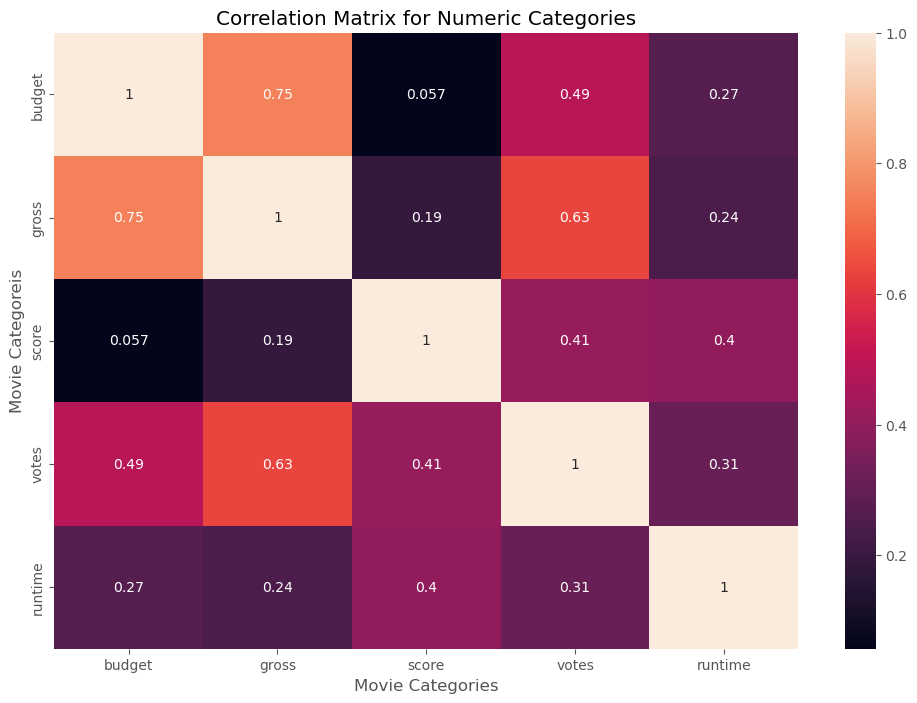

In [52]:
# Visually displaying correlated numeric columns
# As expected, budget/gross are highly correlated
# Gross and votes are correlated

sns.heatmap(correlation_matrix, annot = True)
plt.rcParams['figure.figsize']= (12,10)
plt.title('Correlation Matrix for Numeric Categories')
plt.xlabel('Movie Categories')
plt.ylabel('Movie Categoreis')
plt.show()


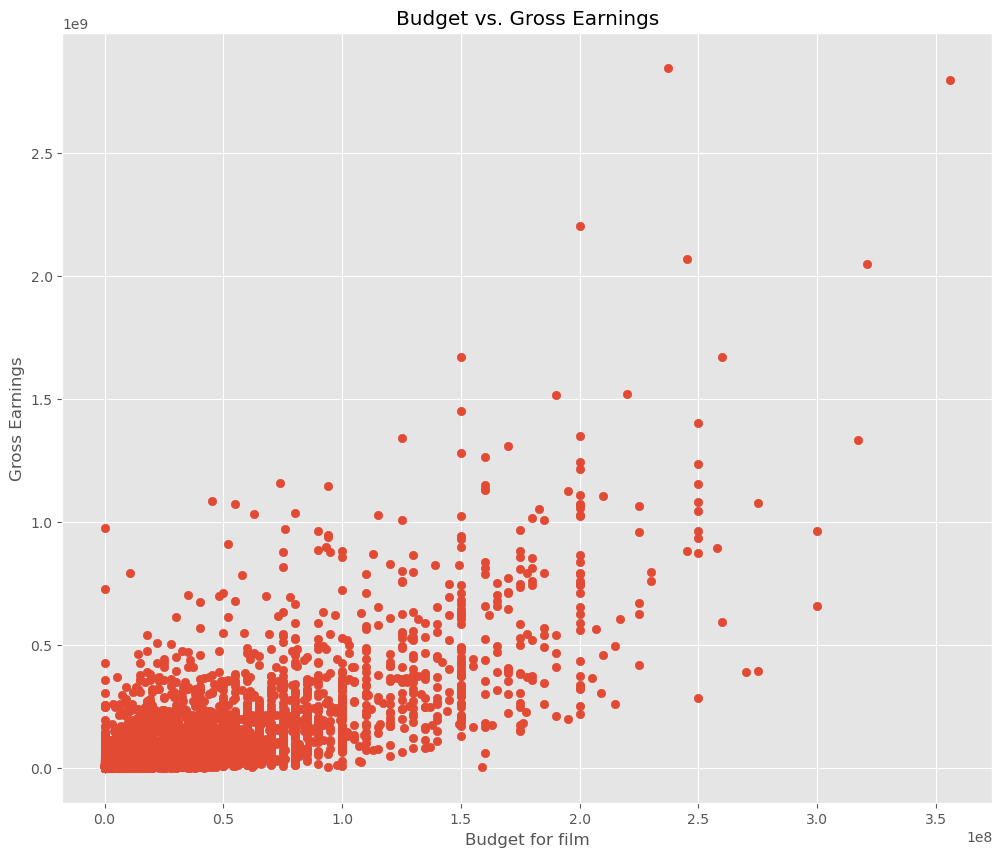

In [54]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.title('Budget vs. Gross Earnings')
plt.rcParams['figure.figsize']=(15,12)
plt.show()

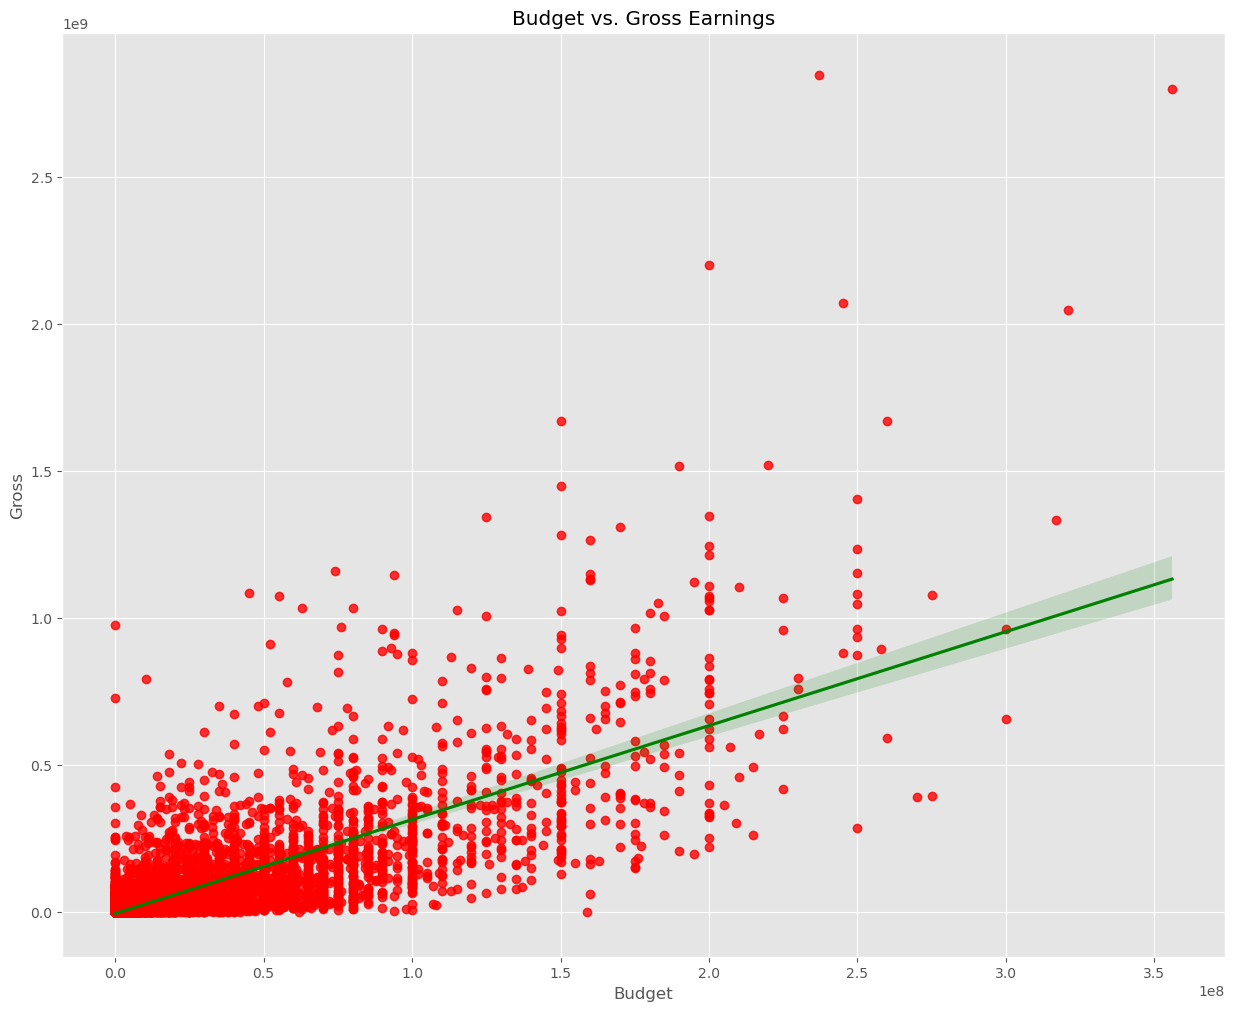

In [56]:
sns.regplot(x = 'budget', y = 'gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "green"})
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs. Gross Earnings')
plt.show()                                                           

# Findings
* Positive correlation between Budget and Gross Earnings

# Correlation Between All Categories
#### What was used:
* For Loop
* Restablishment of variables
* Table to establish structured tabular format of correlation
* Seaborn heatmap to visualize the correlation of all categories

In [60]:
# Created a for loop to convert all values in the dataset to numbers

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
       df_numerized[col_name] = df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,correct_release_year,budget,gross,director,writer,star,company,country,score,votes,runtime
5445,527,5,0,29,237000000,2847246203,1137,1756,2283,2208,55,7.8,1100000,162
7445,529,5,0,39,356000000,2797501328,160,729,2192,1571,55,8.4,903000,181
3045,6811,5,6,17,200000000,2201647264,1137,1756,1560,2208,55,7.8,1100000,194
6663,5075,5,0,35,245000000,2069521700,1107,2518,508,1505,55,7.8,876000,138
7244,530,5,0,38,321000000,2048359754,160,729,2192,1571,55,8.4,897000,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3975,5,6,6,0,0,2305,3725,319,136,55,6.8,214,95
3425,5374,10,4,19,0,0,2111,1683,2440,1803,54,6.3,7400,111
835,1027,4,1,5,0,0,1084,3696,2065,1620,34,6.6,192,101
836,7343,3,6,5,0,0,1122,3205,786,1420,14,6.5,339,130


In [62]:
# Displaying the correlation between categories in tabular format

df_numerized.corr(numeric_only = True)

,name,rating,genre,correct_release_year,budget,gross,director,writer,star,company,country,score,votes,runtime
name,1.000000,-0.011924,0.015300,0.012711,0.020825,0.006817,0.009608,0.010217,0.005685,0.010073,-0.009939,0.016181,0.013180,0.011151
rating,-0.011924,1.000000,0.117566,0.025213,-0.126806,-0.128910,0.017205,-0.004387,0.005905,-0.076807,0.037738,0.011538,0.016086,0.069089
genre,0.015300,0.117566,1.000000,-0.084559,-0.342064,-0.240903,-0.013508,0.007351,-0.003525,-0.068678,-0.031485,0.040090,-0.148420,-0.044631
correct_release_year,0.012711,0.025213,-0.084559,1.000000,0.305530,0.257703,-0.022096,-0.012013,-0.028103,-0.014054,-0.080397,0.109815,0.222317,0.120370
budget,0.020825,-0.126806,-0.342064,0.305530,1.000000,0.750562,0.004140,-0.027145,-0.021930,0.181374,0.126337,0.056781,0.485301,0.270042
gross,0.006817,-0.128910,-0.240903,0.257703,0.750562,1.000000,-0.015027,-0.023834,-0.001470,0.154999,0.094147,0.188259,0.632987,0.244942
director,0.009608,0.017205,-0.013508,-0.022096,0.004140,-0.015027,1.000000,0.297479,0.037570,0.001337,0.015245,0.008071,-0.000627,0.017386
writer,0.010217,-0.004387,0.007351,-0.012013,-0.027145,-0.023834,0.297479,1.000000,0.026584,0.003035,0.014937,0.019084,0.000177,-0.004526
star,0.005685,0.005905,-0.003525,-0.028103,-0.021930,-0.001470,0.037570,0.026584,1.000000,0.009317,-0.017626,-0.002193,-0.020977,0.008474
company,0.010073,-0.076807,-0.068678,-0.014054,0.181374,0.154999,0.001337,0.003035,0.009317,1.000000,0.089006,0.000316,0.129596,0.030941


In [64]:
correlation_matrix2 = df_numerized.corr(numeric_only = True)

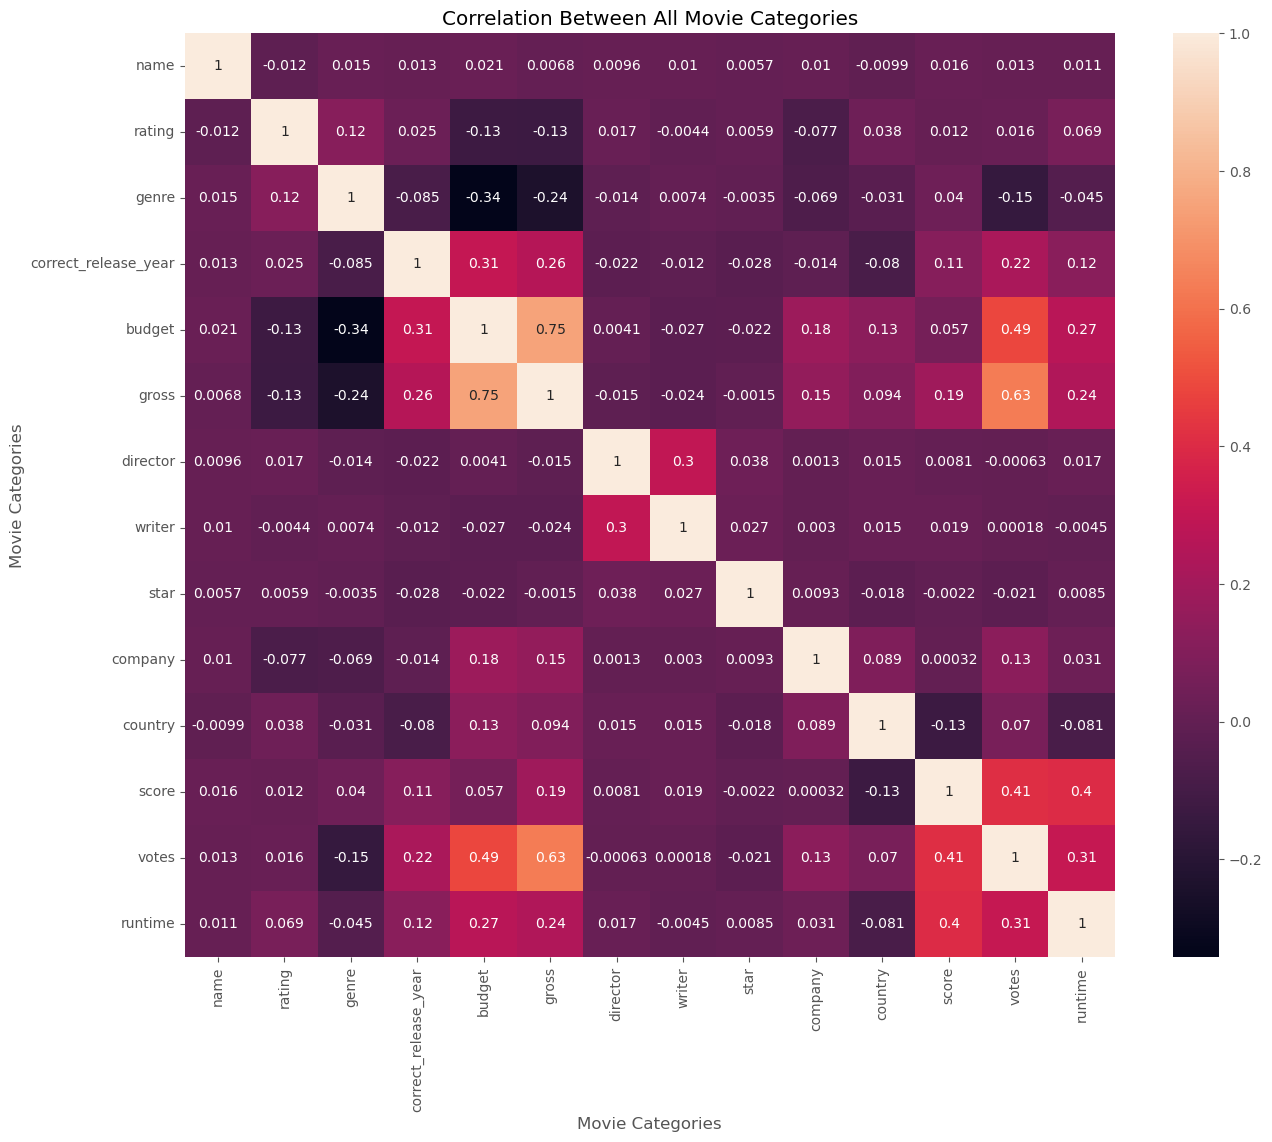

In [66]:
# Created a heatmap using Seaborn to find correlation in visual format

sns.heatmap(correlation_matrix2, annot = True)
plt.rcParams['figure.figsize'] = (18,14)
plt.title('Correlation Between All Movie Categories')
plt.xlabel('Movie Categories')
plt.ylabel('Movie Categories')
plt.show()

# Conclusion
##### After seeing the the entire dataset, the only other highly correlated fields are votes and gross earnings as well as votes and budget.
##### It only makes sense that they are correlated because if a movie does really well in gross earnings, then the vote would as well